In [ ]:
%pip install sec-api

In [24]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")


# Apple 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# get the original HTML of section 7
# "Management’s Discussion and Analysis of Financial Condition and Results of Operations"
section7 = extractorApi.get_section(filing_url, "7", "text")


print (section7)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2024 refer to the year ended December 31, 2024, references to 2023 refer to the year ended December 31, 2023, and 

In [ ]:
%pip install wordcloud

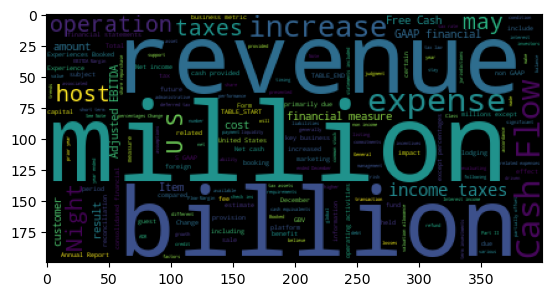

In [25]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section7)
plt.imshow(wc)

In [ ]:
%pip install nltk

In [26]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon
nltk.download('vader_lexicon')

# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is a

True

In [27]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section7)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

{'neg': 0.025, 'neu': 0.894, 'pos': 0.081, 'compound': 0.9998}


In [28]:
#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

Positive


In [ ]:
%pip install transformers

# FinBERT

In [29]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 7 "Management’s Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2024 refer to the year ended December 31, 2024, references to 2023 refer to the year ended December 31, 2023, and 

In [ ]:
%pip install tensorflow
%pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py"

Device set to use cpu


Sentiment Distribution: {'neutral': 71.3, 'positive': 19.44, 'negative': 9.26}


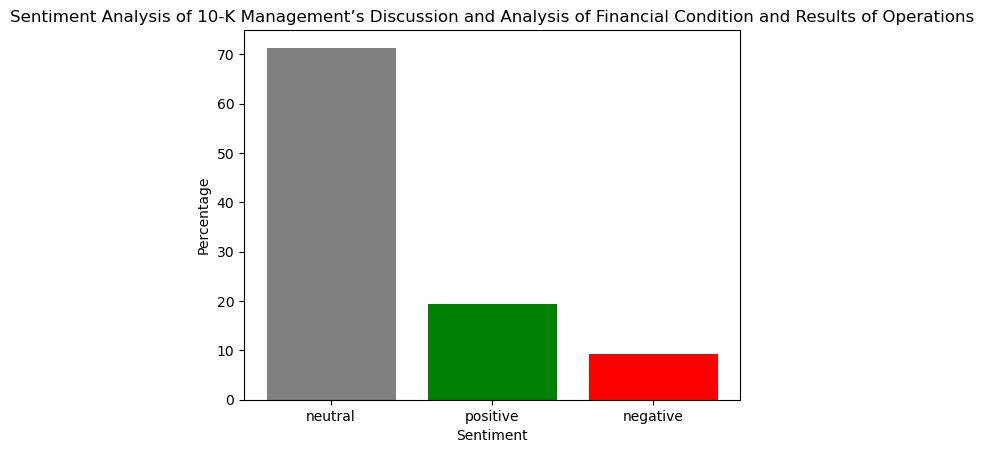

In [30]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Define a mapping of sentiment labels to colors:
    color_map = {"negative": "red", "positive": "green", "neutral": "gray"}
    
    # Create a list of colors corresponding to the order of sentiment labels in the percentage dictionary
    colors = [color_map[label] for label in percentage.keys()]

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2024

In [31]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2024 refer to the year ended December 31, 2024, references to 2023 refer to the year ended December 31, 2023, and 

Device set to use cpu


Sentiment Distribution: {'neutral': 71.3, 'positive': 19.44, 'negative': 9.26}


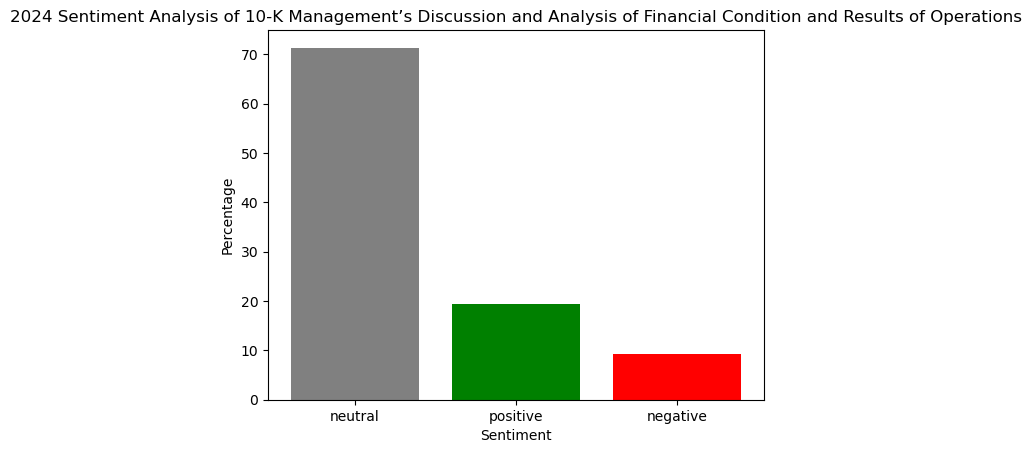

In [32]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Define a mapping of sentiment labels to colors:
    color_map = {"negative": "red", "positive": "green", "neutral": "gray"}
    
    # Create a list of colors corresponding to the order of sentiment labels in the percentage dictionary
    colors = [color_map[label] for label in percentage.keys()]

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("2024 Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2023

In [34]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972024000006/abnb-20231231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2023 refer to the year ended December 31, 2023, references to 2022 refer to the year ended December 31, 2022, and 

Device set to use cpu


Sentiment Distribution: {'neutral': 66.37, 'positive': 23.89, 'negative': 9.73}


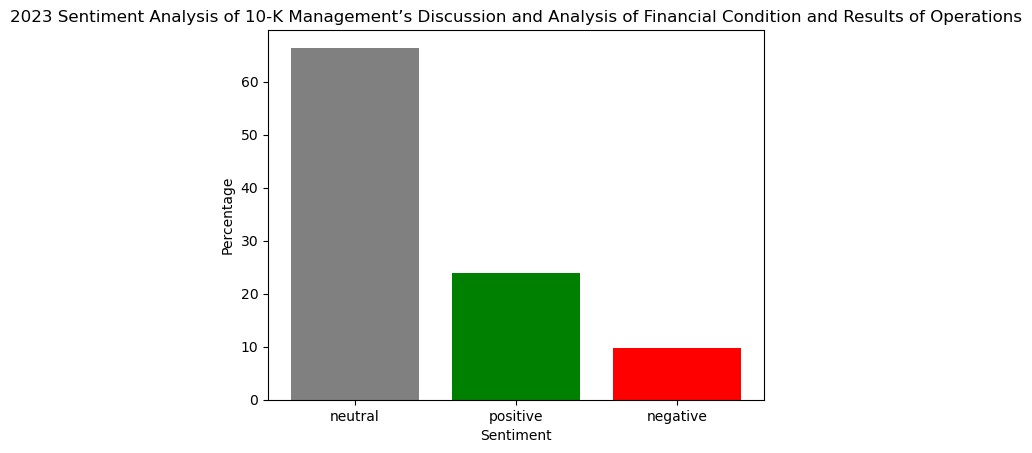

In [36]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("2023 Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2022

In [37]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972023000003/abnb-20221231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2022 refer to the year ended December 31, 2022, references to 2021 refer to the year ended December 31, 2021, and 

Device set to use cpu


Sentiment Distribution: {'neutral': 70.07, 'positive': 21.9, 'negative': 8.03}


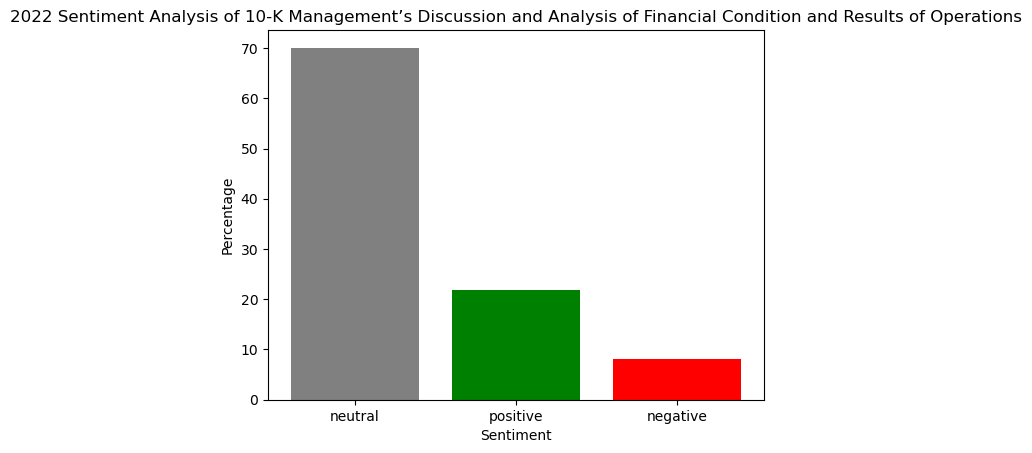

In [39]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("2022 Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2021

In [40]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972022000006/abnb-20211231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2021 refer to the year ended December 31, 2021, references to 2020 refer to the year ended December 31, 2020, and 

Device set to use cpu


Sentiment Distribution: {'neutral': 66.49, 'positive': 19.15, 'negative': 14.36}


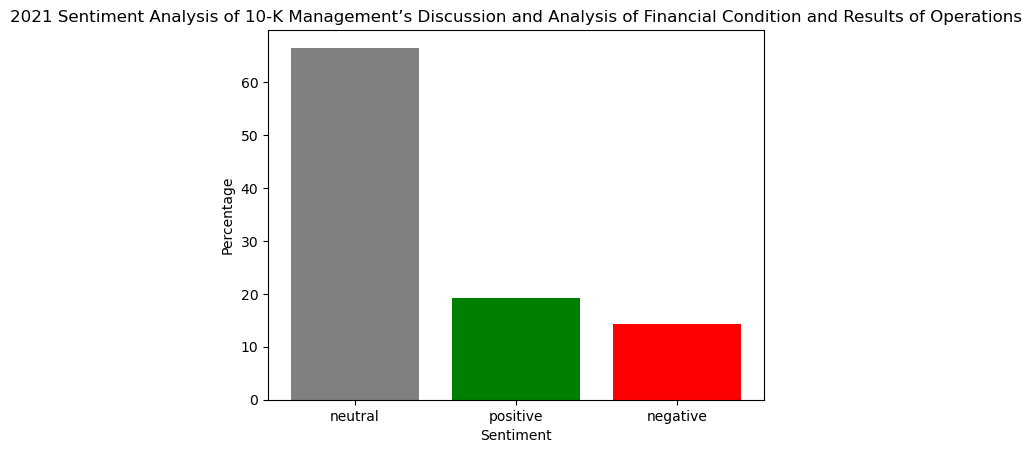

In [42]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("2021 Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2020

In [43]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972021000010/airbnb-10k.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2020 refer to the year ended December 31, 2020, references to 2019 refer to the year ended December 31, 2019, and 

Device set to use cpu


Sentiment Distribution: {'neutral': 62.2, 'positive': 17.48, 'negative': 20.33}


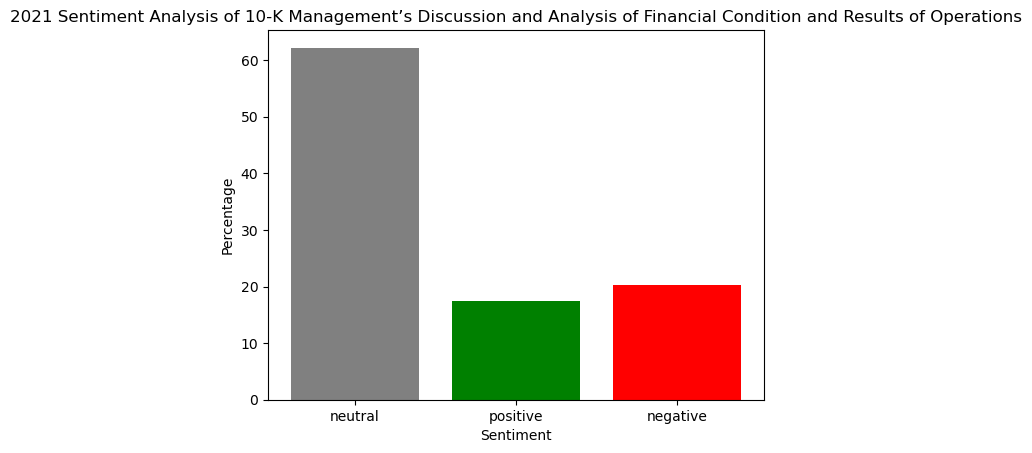

In [44]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'green', 'red'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("2021 Sentiment Analysis of 10-K Management’s Discussion and Analysis of Financial Condition and Results of Operations")
    plt.show()

else:
    print("Section 7 not found.")